<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Collect_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import itertools 

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets/'

Mounted at /content/gdrive


In [10]:
secrets = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/API_keys.csv")

In [11]:
consumer_key= secrets['consumer_key']
consumer_secret= secrets['consumer_secret']
access_token= secrets['access_token']
access_token_secret= secrets['access_token_secret']


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
#, wait_on_rate_limit=True, timeout = 5

#Collect the datasets

In [ ]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets4(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.search(q = screen_name, rpp = 100, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q = screen_name,rpp = 100,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [ ]:
get_all_tweets4('#saudia_care')

getting tweets before 1337035614730915839
...30 tweets downloaded so far
getting tweets before 1336763263082696705
...45 tweets downloaded so far
getting tweets before 1336700087830011908
...60 tweets downloaded so far
getting tweets before 1336515175319564288
...71 tweets downloaded so far
getting tweets before 1336452110418927618
...86 tweets downloaded so far
getting tweets before 1336430076884365316
...98 tweets downloaded so far
getting tweets before 1336403765386207232
...112 tweets downloaded so far
getting tweets before 1336337692213198850
...126 tweets downloaded so far
getting tweets before 1336074483551981567
...139 tweets downloaded so far
getting tweets before 1335987378062671881
...152 tweets downloaded so far
getting tweets before 1335946554016935936
...167 tweets downloaded so far
getting tweets before 1335777383127937024
...182 tweets downloaded so far
getting tweets before 1335684440064847872
...197 tweets downloaded so far
getting tweets before 1335127416310788096
..

#Combine the same airline with different hashtags in one file 

**read the datasets**

In [ ]:
saudia1 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/saudia_tweets_try1.csv')
saudia2 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#saudia_tweets.csv')
saudia3 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#saudi_airlines_tweets.csv')

In [ ]:
united1 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#UnitedAirlines_tweets.csv')
united2 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#United_Airlines_tweets.csv')


**combine**

In [ ]:
saudia = [saudia1, saudia2, saudia3]
saudia_airline = pd.concat(saudia)

In [ ]:
united = [united1, united2]
united_airline = pd.concat(united)

**save**

In [ ]:
saudia_airline.to_csv('saudia_airline.csv')
!cp saudia_airline.csv "./gdrive/My Drive/datasets/new_datasets/"

In [ ]:
united_airline.to_csv('united_airline.csv')
!cp united_airline.csv "./gdrive/My Drive/datasets/new_datasets/"

#Read all the files

In [ ]:
#read all files in new_datasets 
# use join for multi platform compatibility
import csv
import os
import sys
import re
import glob

all_files = []
for infile in glob.glob(os.path.join(path, '*.csv')):
    
    # infile stores the complete path of the file
    print("Current File Being Processed is:  " + infile)
    read_one = pd.read_csv(infile)
    all_files.append(read_one)

    #use split to seperate the path and name of the file
    (PATH, FILENAME) = os.path.split(infile)
    print(" PATH is " + PATH)
    print(" FILENAME is " + FILENAME)
    
    #use splitext() to seperate name of the file and the extension
    (ShortName, Extension) = os.path.splitext(FILENAME)
    print(ShortName)
    print(Extension)

Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/saudia_airline.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is saudia_airline.csv
saudia_airline
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/united_airline.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is united_airline.csv
united_airline
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/virginatlantic_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is virginatlantic_tweets.csv
virginatlantic_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/turkishairlines_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is turkishairlines_tweets.csv
turkishairlines_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/Singapore _Airlines_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is Singapore _A

#Filter English tweets

**Saudia Airlines**

In [ ]:
saudia_airlines_en = saudia_airlines[saudia_airlines.language == "en"]

In [ ]:
saudia_airlines_en.shape

(1373, 8)

In [ ]:
saudia_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
5,1336728569272262663,2020-12-09 17:45:00,"@Shakeel60633858 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
7,1336719354537369603,2020-12-09 17:08:23,"@Zishanh31436141 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
9,1336711502087254018,2020-12-09 16:37:11,"@AnwarHu13119859 Hello dear valued guest, once...",0,False,Saudi Arabia,en,Saudi_airlines
14,1336705261340332032,2020-12-09 16:12:23,"@Emuyefetari Dear valued guest, kindly review ...",0,False,Saudi Arabia,en,Saudi_airlines
19,1336693042225483781,2020-12-09 15:23:50,"@KashmirLakha5 Dear guest, there is no flight ...",0,False,Saudi Arabia,en,Saudi_airlines


**Flynas**

In [ ]:
flynas_airlines_en = flynas_airlines[flynas_airlines.language == "en"]

In [ ]:
flynas_airlines_en.shape

(225, 8)

In [ ]:
flynas_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
11,1336631281145294850,2020-12-09 11:18:25,"@lahoridhol hello, dear kindly cheek link belo...",0,False,Saudi Arabia,en,flynas
24,1336548014068994051,2020-12-09 05:47:33,"@jessica_uys Hello, kindly provide us with you...",0,False,Saudi Arabia,en,flynas
25,1336463232177934338,2020-12-09 00:10:39,"@saqibxtc Good morning dear , kindly provide u...",0,False,Saudi Arabia,en,flynas
45,1336310819198537740,2020-12-08 14:05:01,"@nandlal23173532 Dear, Follow us if available ...",0,False,Saudi Arabia,en,flynas
53,1336270489245921280,2020-12-08 11:24:45,@HusainA89126244 kindly delete the tweet becau...,0,False,Saudi Arabia,en,flynas


As we can see here there is **imbalance** in the number of tweets in Saudia Airlines and Flynas so we must consider this when apply **Machine Learning**

#Combine the data sets


In [ ]:
airline = pd.concat(all_files)

In [ ]:
airline.shape

(3834, 9)

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 0 to 246
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  873 non-null    float64
 1   tweet_id    3834 non-null   int64  
 2   created_at  3834 non-null   object 
 3   text        3834 non-null   object 
 4   likes       3834 non-null   int64  
 5   retweeted   3834 non-null   bool   
 6   location    2942 non-null   object 
 7   language    3834 non-null   object 
 8   airline     3834 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 273.3+ KB


**remove dummy variable**

In [ ]:
airline = airline.drop(columns = ['Unnamed: 0'])

In [ ]:
airline.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
292,1334546223802556417,2020-12-03 17:13:09,Me and my sister showing how we felt about our flight on G-VLIP from Gatwick to Las Vegas in 201...,5,False,London,en,#virginatlantic
73,1336966824416735234,2020-12-10 09:31:45,"RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, socia...",0,False,"الرياض, المملكة العربية السعود",en,Saudia airlines
164,1335791004516044801,2020-12-07 03:39:27,@AirCanada why is it not possible for me to refund my cancelled flight ticket since March2020? W...,2,False,NaN,en,#AirCanada
433,1336966824416735234,2020-12-10 09:31:45,"RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, socia...",0,False,"الرياض, المملكة العربية السعود",en,Saudia airlines
68,1335868495565905920,2020-12-07 08:47:23,RT @GINIEJET11: #AirFrance Cargo 💙🤍❤️\n\n#aviation #aviationlovers #avgeek #aviationlife #aviati...,0,False,NaN,en,#airfrance
243,1333818452377800705,2020-12-01 17:01:14,Air Canada Provides Update on Cargo Business #Aviation #AvGeek #AirCanada .@AirCanada \nhttps://...,0,False,"Fort Atkinson, WI",en,#AirCanada
138,1335987378062671882,2020-12-07 16:39:47,"THIS. IS.TRULY. SICKENING... #AirCanada still has $1,785.09:\n\n #PayPassengres...",0,False,"Vancouver, B.C.",en,#AirCanada
28,1337059633668771849,2020-12-10 15:40:32,RT @qatarairways: Do you know a healthcare hero who would love a well-deserved holiday when trav...,0,False,NaN,en,#qatarairways
51,1334093738730205184,2020-12-02 11:15:08,RT @jfkjetsofficial: These stunning @SingaporeAir @Airbus A350s needed their beauty sleep in bet...,0,False,NaN,en,#Singapore _Airlines
270,1334596820383772675,2020-12-03 20:34:12,RT @AirbusRed: A respectful final taxy of Manchester for G-VXLG ‘Ruby Tuesday’ led by a ground o...,0,False,United Kingdom,en,#virginatlantic


#Check the duplicated tweets and remove it 



In [ ]:
airline.drop_duplicates(subset='text', inplace= True)

In [ ]:
airline.shape

(1857, 8)

In [ ]:
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1336979288470548481,2020-12-10 10:21:16,"RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, socia...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines
2,1336950027005161473,2020-12-10 08:25:00,"To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, social development a...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines
540,1336909751532351489,2020-12-10 05:44:58,DM&amp;Get 80+ Mark\n+923136861386\n#Java\n#DataBase\n#Accounting\n#Finance\n#Business \n#Econom...,0,False,NaN,en,#saudia
541,1336827127824572422,2020-12-10 00:16:38,RT @essaygenius_ctr: I'llDo ur #Math #Stat #Marketing #Accounting #onlineExam\n\nText/awhatsapp ...,0,False,NaN,en,#saudia
542,1336826958764789762,2020-12-10 00:15:58,I'llDo ur #Math #Stat #Marketing #Accounting #onlineExam\n\nText/awhatsapp +1 213 212-5976\n\n#H...,2,False,United States,en,#saudia


#rename airline's name 

In [ ]:
airline.loc[airline['airline'] == '#saudia', 'airline'] = 'Saudia airlines'
airline.loc[airline['airline'] == '#saudia_airlines', 'airline'] = 'Saudia airlines'
airline.loc[airline['airline'] == 'Saudia airlines', 'airline'] = 'Saudia airlines'
airline.loc[airline['airline'] == '#saudi_airlines', 'airline'] = 'Saudia airlines'

In [ ]:
airline.loc[airline['airline'] == '#Singapore _Airlines', 'airline'] = 'Singapor airlines'

In [ ]:
airline.loc[airline['airline'] == '#Americanairlines', 'airline'] = 'American airlines'

In [ ]:
airline.loc[airline['airline'] == '#britishairways', 'airline'] = 'British airways'

In [ ]:
airline.loc[airline['airline'] == '#AirCanada', 'airline'] = 'Air Canada'

In [ ]:
airline.loc[airline['airline'] == '#qatarairways', 'airline'] = 'Qatar airways'

In [ ]:
airline.loc[airline['airline'] == '#airfrance', 'airline'] = 'Air France'

In [ ]:
airline.loc[airline['airline'] == '#virginatlantic', 'airline'] = 'Virgin Atlantic'

In [ ]:
airline.loc[airline['airline'] == '#UnitedAirlines', 'airline'] = 'United Airlines'
airline.loc[airline['airline'] == '#United_Airlines', 'airline'] = 'United Airlines'

In [ ]:
airline.loc[airline['airline'] == '#turkishairlines', 'airline'] = 'Turkish airlines'

In [ ]:
airline.loc[airline['airline'] == '#flydubai', 'airline'] = 'fly Dubai'

In [ ]:
airline.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
162,1335169940211568640,2020-12-05 10:31:34,"The British airline, #VirginAtlantic, has announced to commence its flight operation for #Pakist...",2,False,Karachi Pakistan,en,Virgin Atlantic
14,1336436473529176064,2020-12-08 22:24:19,Singapore Airlines To Strengthen Ties With India’s Vistara \n#Singapore #Airlines #vistara #Indi...,3,False,"Dadaocheng, Taipei.🇹🇼",en,Singapor airlines
412,1335509283471904770,2020-12-06 09:00:00,UV cleaning with the @HoneywellAero systems ensures that our aircraft cabin is disinfected befor...,138,False,"Doha, Qatar",en,Qatar airways
236,1334199371852902404,2020-12-02 18:14:53,"RT @UweMuegge: #AirCanada seek a #Temporary #English &gt; #French #Translator in #Dorval, #Canad...",0,False,NaN,en,Air Canada
205,1335628496169824258,2020-12-06 16:53:42,Angels in the Mist. #BritishAirways https://t.co/UX0A1YsYBB,3,False,"England, United Kingdom",en,British airways
284,1334707064673771524,2020-12-04 03:52:16,@ShameOnLA @AdamSmithMD #usdtry #turkishlira #bist100 #DolarTL $TUR #SanctionTurkey #turkiye #...,1,False,GAVURISTAN,en,Turkish airlines
179,1335848559837638656,2020-12-07 07:28:10,Caught in a 🌈 is this BEA Trident 3 on display at the Runway Visitor Park at @manairport #avgeek...,74,False,Manchester,en,British airways
252,1336272918553251841,2020-12-08 11:34:25,How shameful &amp; low can QR stoop? Being kind &amp; compassionate is what employees want the a...,0,False,Frankfurt,en,Qatar airways
111,1335228177510088707,2020-12-05 14:22:59,Find flight deals to #Tirana from UK and book today. Major airlines connecting both the destinat...,0,False,"2nd Floor, 7 Mackenzie Street, Slough – SL1 1XQ",en,Air France
155,1335946996868321280,2020-12-07 13:59:19,"RT @SamBennB: @Debs0705 For all @British_Airways future customers, BA will stop replying you and...",0,False,Aberdeenshire,en,British airways


#**NLP text pre-processing**

#using regular expression

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'\d', '', text)
 text = "".join([word.lower() for word in text if word not in string.punctuation])
 
 return text

In [ ]:
# Clean the tweets
airline["text"] = airline["text"].apply(cleanTxt)

# Show the cleaned tweets
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1336979288470548481,2020-12-10 10:21:16,to achieve the kingdoms vision 🇸🇦 in the sustainability of economic power social development an...,0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines
2,1336950027005161473,2020-12-10 08:25:00,to achieve the kingdoms vision 🇸🇦 in the sustainability of economic power social development and...,5,False,"Jeddah, Saudi Arabia",en,Saudia airlines
540,1336909751532351489,2020-12-10 05:44:58,dmampget mark\n\njava\ndatabase\naccounting\nfinance\nbusiness \neconomics \nstatistics \ncalcu...,0,False,NaN,en,Saudia airlines
541,1336827127824572422,2020-12-10 00:16:38,ctr illdo ur math stat marketing accounting onlineexam\n\ntextawhatsapp \n\nhomework\nassignme...,0,False,NaN,en,Saudia airlines
542,1336826958764789762,2020-12-10 00:15:58,illdo ur math stat marketing accounting onlineexam\n\ntextawhatsapp \n\nhomework\nassignment…,2,False,United States,en,Saudia airlines


#Tokanization

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [ ]:

airline['text'] = airline['text'].apply(lambda x: tokenization(x.lower()))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1336979288470548481,2020-12-10 10:21:16,"[, to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, dev...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines
2,1336950027005161473,2020-12-10 08:25:00,"[to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, devel...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistics, calculus, ]",0,False,NaN,en,Saudia airlines
541,1336827127824572422,2020-12-10 00:16:38,"[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm...",0,False,NaN,en,Saudia airlines
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]",2,False,United States,en,Saudia airlines


#stemming

stemming is basically an algorithm to categorize similar words into one. 

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

In [ ]:
airline['Tweet_stemmed'] = airline['text'].apply(lambda x: stemming(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed
0,1336979288470548481,2020-12-10 10:21:16,"[, to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, dev...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,"[, to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, ..."
2,1336950027005161473,2020-12-10 08:25:00,"[to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, devel...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,"[to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, kn..."
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistics, calculus, ]",0,False,NaN,en,Saudia airlines,"[dmampget, mark, java, databas, account, financ, busi, econom, statist, calculu, ]"
541,1336827127824572422,2020-12-10 00:16:38,"[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm...",0,False,NaN,en,Saudia airlines,"[ctr, illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, onlin, ]"
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]",2,False,United States,en,Saudia airlines,"[illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, ]"


#Lemmatizing

According to wiki, Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech

In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    text = [wn.lemmatize(word) for word in text]
    return text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
airline['Tweet_lemmatized'] = airline['text'].apply(lambda x: lemmatize(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1336979288470548481,2020-12-10 10:21:16,"[, to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, dev...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,"[, to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, ...","[, to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, deve..."
2,1336950027005161473,2020-12-10 08:25:00,"[to, achieve, the, kingdoms, vision, in, the, sustainability, of, economic, power, social, devel...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,"[to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, kn...","[to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, develo..."
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistics, calculus, ]",0,False,NaN,en,Saudia airlines,"[dmampget, mark, java, databas, account, financ, busi, econom, statist, calculu, ]","[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus, ]"
541,1336827127824572422,2020-12-10 00:16:38,"[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm...",0,False,NaN,en,Saudia airlines,"[ctr, illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, onlin, ]","[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm..."
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]",2,False,United States,en,Saudia airlines,"[illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, ]","[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]"


In fact, it can be clearly seen that lemmatizing better than stemming since some the words transformed to meaningless words such as kindli instead of being kindly which is the correct form of the word 

Now let's compare the number of unique words in Lemmatizing and Stemming

In [ ]:
listOfWordsLemma = list(itertools.chain.from_iterable(airline['Tweet_lemmatized']))
listOfWordsStem = list(itertools.chain.from_iterable(airline['Tweet_stemmed']))

#number of unique tokens
print("Unique words aft Lemm :"+str(len(set(listOfWordsLemma))))
print("Unique words aft Stem :"+str(len(set(listOfWordsStem))))

Unique words aft Lemm :4396
Unique words aft Stem :3899


Surprisingly the Stemmed version got a lesser number of words. Therefore I will have to move forward with ['Tweet_lemmatized'] data set.

#Remove stopwords

In [ ]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [ ]:
airline['text'] = airline['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1336979288470548481,2020-12-10 10:21:16,"[, achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tr...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,"[, to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, ...","[, to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, deve..."
2,1336950027005161473,2020-12-10 08:25:00,"[achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tran...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,"[to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, kn...","[to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, develo..."
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus, ]",0,False,NaN,en,Saudia airlines,"[dmampget, mark, java, databas, account, financ, busi, econom, statist, calculu, ]","[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus, ]"
541,1336827127824572422,2020-12-10 00:16:38,"[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm...",0,False,NaN,en,Saudia airlines,"[ctr, illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, onlin, ]","[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm..."
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]",2,False,United States,en,Saudia airlines,"[illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, ]","[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]"


Now, let's check the number of unique words has reduced or not. Ideally, there has to be some reduction. 

In [ ]:
listOfWordsNonstop = list(itertools.chain.from_iterable(airline['text']))

#number of unique tokens in first data set
print("Unique words aft removing stop words :"+str(len(set(listOfWordsNonstop))))

Unique words aft removing stop words :4270


#remove short words 

In [ ]:
def shortword(text):
    text = [word for word in text if len(word)>3]
    return text

In [ ]:
airline['text'] = airline['text'].apply(lambda x: shortword(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1336979288470548481,2020-12-10 10:21:16,"[achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tran...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,"[, to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, ...","[, to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, deve..."
2,1336950027005161473,2020-12-10 08:25:00,"[achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tran...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,"[to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, kn...","[to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, develo..."
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus]",0,False,NaN,en,Saudia airlines,"[dmampget, mark, java, databas, account, financ, busi, econom, statist, calculu, ]","[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus, ]"
541,1336827127824572422,2020-12-10 00:16:38,"[illdo, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, onlin]",0,False,NaN,en,Saudia airlines,"[ctr, illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, onlin, ]","[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm..."
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment]",2,False,United States,en,Saudia airlines,"[illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, ]","[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]"


#Convert tokens into string

In [ ]:
def join_tokens(tokens):
  document = " ".join([word for word in tokens if not word.isdigit()])
  return document

In [ ]:
airline['string_text'] = airline['text'].apply(lambda x: join_tokens(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized,string_text
0,1336979288470548481,2020-12-10 10:21:16,"[achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tran...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,"[, to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, ...","[, to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, deve...",achieve kingdom vision sustainability economic power social development knowledge transfer
2,1336950027005161473,2020-12-10 08:25:00,"[achieve, kingdom, vision, sustainability, economic, power, social, development, knowledge, tran...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,"[to, achiev, the, kingdom, vision, in, the, sustain, of, econom, power, social, develop, and, kn...","[to, achieve, the, kingdom, vision, in, the, sustainability, of, economic, power, social, develo...",achieve kingdom vision sustainability economic power social development knowledge transfer aviat...
540,1336909751532351489,2020-12-10 05:44:58,"[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus]",0,False,NaN,en,Saudia airlines,"[dmampget, mark, java, databas, account, financ, busi, econom, statist, calculu, ]","[dmampget, mark, java, database, accounting, finance, business, economics, statistic, calculus, ]",dmampget mark java database accounting finance business economics statistic calculus
541,1336827127824572422,2020-12-10 00:16:38,"[illdo, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, onlin]",0,False,NaN,en,Saudia airlines,"[ctr, illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, onlin, ]","[ctr, illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignm...",illdo math stat marketing accounting onlineexam textawhatsapp homework assignment onlin
542,1336826958764789762,2020-12-10 00:15:58,"[illdo, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment]",2,False,United States,en,Saudia airlines,"[illdo, ur, math, stat, market, account, onlineexam, textawhatsapp, homework, assign, ]","[illdo, ur, math, stat, marketing, accounting, onlineexam, textawhatsapp, homework, assignment, ]",illdo math stat marketing accounting onlineexam textawhatsapp homework assignment


#spelling correction

In [ ]:
from textblob import TextBlob
airline['text'] = airline['text'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: ignored

#Removing words with fewer frequencies

#Word cloud visualization

<function matplotlib.pyplot.show>

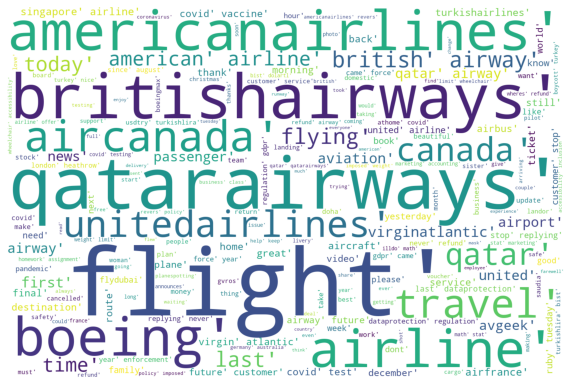

In [ ]:
allWords = ''.join([str(twts) for twts in airline['text']])
wrdcld = WordCloud(background_color='white',
                      width=1500,
                      height=1000).generate(allWords)
plt.figure(figsize=(10,10))
plt.imshow(wrdcld)
plt.axis('off')
plt.show

Removing columns because we need only the last process from cleaning the data

In [ ]:
airline = airline.drop(['Tweet_lemmatized', 'Tweet_stemmed'], axis=1)

In [ ]:
airline.sample(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text
25,1336778045240307717,2020-12-09 21:01:36,"[virgin, landing, airport, spotter, spotter, spotting, planespotting, planespotter, virgin]",0,False,Worldwide,en,Virgin Atlantic,virgin landing airport spotter spotter spotting planespotting planespotter virgin
228,1333843324696932356,2020-12-01 18:40:04,"[start, shipping, covid, vaccine, unitedairlines]",0,False,"Toronto, Ontario",en,United Airlines,start shipping covid vaccine unitedairlines
76,1336440854509187072,2020-12-08 22:41:44,"[think, along, rail, route, aircanada]",0,False,"Corner Brook, NL",en,Air Canada,think along rail route aircanada
272,1336140622227390466,2020-12-08 02:48:43,"[challenging, year, aviation, airbus, family, grew, angeles, avgeek]",1,False,"Los Angeles, CA",en,Qatar airways,challenging year aviation airbus family grew angeles avgeek
557,1334340018844758018,2020-12-03 03:33:45,"[understood, saudiarabia, open, space, qatarairways, flight, report]",10,False,"Doha, Qatar",en,Qatar airways,understood saudiarabia open space qatarairways flight report


#Save the data set

In [ ]:
airline.to_csv('airline.csv')
!cp airline.csv "./gdrive/My Drive/datasets/new_datasets/"